# EDA

In [2]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from glob import glob

In [4]:
# extract path of male and female in crop_data folder and pul them in a list
fpath = glob("./crop_data/female/*.jpg")
mpath = glob("./crop_data/male/*.jpg")

In [5]:
df_female = pd.DataFrame(fpath,columns=["filepath"])
df_female["gender"] = 'gender'
df_male = pd.DataFrame(mpath,columns=["filepath"])
df_male["gender"]="male"

df = pd.concat((df_female,df_male),axis=0)
df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,gender
1,./crop_data/female\female_1.jpg,gender
2,./crop_data/female\female_100.jpg,gender
3,./crop_data/female\female_1002.jpg,gender
4,./crop_data/female\female_1005.jpg,gender


In [6]:
df.tail()

,filepath,gender
2311,./crop_data/male\male_994.jpg,male
2312,./crop_data/male\male_996.jpg,male
2313,./crop_data/male\male_997.jpg,male
2314,./crop_data/male\male_998.jpg,male
2315,./crop_data/male\male_999.jpg,male


In [7]:
df.shape

(5020, 2)

In [8]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [9]:
df["dimension"] = df["filepath"].apply(get_size)

In [10]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,gender,273
1,./crop_data/female\female_1.jpg,gender,182
2,./crop_data/female\female_100.jpg,gender,122
3,./crop_data/female\female_1002.jpg,gender,122
4,./crop_data/female\female_1005.jpg,gender,182


<AxesSubplot:>

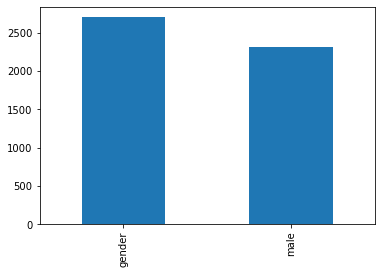

In [11]:
df["gender"].value_counts().plot(kind='bar')

In [12]:
df_filter = df.query('dimension>60')


In [13]:
df_filter.shape

(4555, 3)

In [14]:
df_filter["gender"].value_counts(normalize=True)

gender    0.543359
male      0.456641
Name: gender, dtype: float64

# Structure the images

 - 100 X 100

In [15]:
def structuring(path):
    try:
        # step 1 - read image
        img = cv2.imread(path) # BGR
        # step 2 - convert into gray scale
        gray  = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step 3 - resize 100 X 100
        size = gray.shape[0]
        if size>=100:
            # cv2.INTER_AREA (SHRINK) if >100
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE) if < 100
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        # step 4 - Flattern Image
        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
        return None

In [16]:
df_filter["data"] = df_filter['filepath'].apply(structuring) # convert all images to 100 X 100

C:\Users\0036YD744\AppData\Local\Temp\ipykernel_9912\2099550794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["data"] = df_filter['filepath'].apply(structuring) # convert all images to 100 X 100


In [17]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,gender,273,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,./crop_data/female\female_1.jpg,gender,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./crop_data/female\female_100.jpg,gender,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\female_1002.jpg,gender,122,"[132, 121, 118, 97, 85, 92, 91, 110, 155, 162,..."
4,./crop_data/female\female_1005.jpg,gender,182,"[234, 234, 234, 228, 231, 205, 122, 98, 74, 54..."


In [18]:
data = df_filter['data'].apply(pd.Series)

In [20]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [21]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240


# Data Normalization

In [22]:
data = data/255.0

In [23]:
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.427451,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.227451,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.823529,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.631373,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,0.266667,0.337255,0.258824,0.231373,0.411765,0.360784,0.384314,0.321569,0.305882,0.631373,...,0.450980,0.462745,0.443137,0.478431,0.474510,0.474510,0.505882,0.529412,0.525490,0.529412
2311,0.066667,0.066667,0.062745,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.058824,...,0.847059,0.870588,0.898039,0.913725,0.917647,0.929412,0.925490,0.921569,0.917647,0.913725
2313,0.701961,0.705882,0.705882,0.709804,0.713725,0.717647,0.709804,0.705882,0.709804,0.713725,...,0.552941,0.545098,0.533333,0.556863,0.580392,0.607843,0.643137,0.670588,0.690196,0.729412
2314,0.149020,0.145098,0.145098,0.149020,0.152941,0.156863,0.152941,0.149020,0.149020,0.149020,...,0.141176,0.125490,0.117647,0.121569,0.149020,0.192157,0.219608,0.239216,0.254902,0.266667


In [24]:
data["gender"] = df_filter["gender"]

In [25]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,gender
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,gender
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,gender
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,gender
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,gender


### 

In [28]:
data.isnull().sum().sum()

0

In [30]:
data.dropna(inplace=True)

In [31]:
data.shape

(4555, 10001)

In [32]:
## save the data for future study

In [34]:
import pickle

pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))